In [241]:
import numpy as np
import matplotlib.pyplot as plt

Author: Jahrul Alam (alamj@mun.ca)
This code is used for demonstraing an example of 
Fast Fourier Transform using numpy.

It shows that FFT can exactly capture the frequencies of any signal.
For instance, if we have a turbulent flow signal (u(t) as a probe signal)
the example shows how to scale and detect the frequencies.

If we increase L, frequencies of the example signal does not change. 
The code shows how this was implemented in numpy

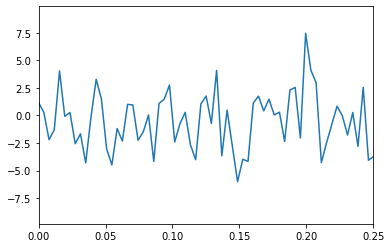

In [242]:
n = 1024
np.random.seed(123456)

L = 4
dx = L/n
x = np.linspace(0,L,n)
f = np.sin(2*np.pi*50*x/L) + np.sin(2*np.pi*125*x/L)
fclean = f
f = fclean + 2.5*np.random.randn(n)
plt.plot(x,f)
plt.xlim(0,0.25)
plt.show()

(0.0, 200.0)

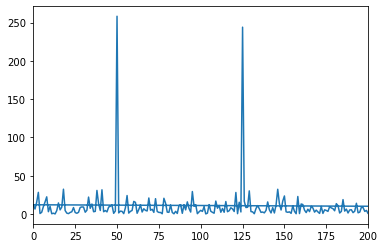

In [243]:
fhat = np.fft.fft(f)
psd = fhat*np.conj(fhat)/n
k = np.fft.fftfreq(n, d=dx) * L

plt.plot(k,psd.real)
plt.xlim(0,200)

(0.0, 200.0)

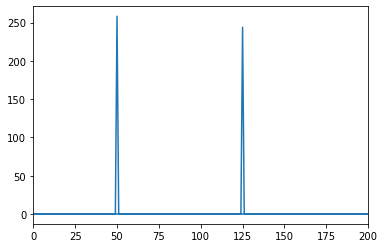

In [244]:
mask = (psd.real > 100)
psdf = psd*mask

plt.plot(k,psdf.real)
plt.xlim(0,200)

In [245]:
def threshold(f, eps):
    x = np.abs(f) - eps

    return np.sign(f)*np.maximum(x,np.zeros_like(x))

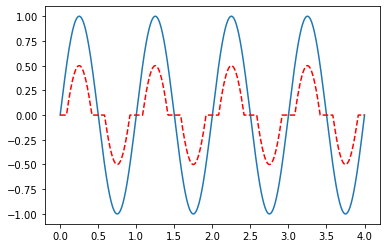

In [246]:
f = np.sin(2*np.pi*x)

g = threshold(f,0.5)
plt.plot(x,f)
plt.plot(x,g,'r--')